## 07 - Image Description

### Part 2 - Texture descriptors

Colour can also be a good image descriptor to allow comparing images based on their content. Histogram-based methods are often employed for this type of task


---
### Características de textura

Consideram não apenas os valores absolutos dos pixels, mas também sua relação com vizinhos.
* regiões planas tem significado diferente de regiões com alta variação
* diferentes padrões de variação possuem significado diferente de textura

| Textura | Exemplo | Textura | Exemplo
|:---:|:---:|:---:|:---:|
| Entrelaçado | ![Entrelaçado](dados/texture_interlaced.jpg)|  Borbulhante | ![Borbulhante](dados/texture_bubbly.jpg)|
| Espargido | ![Polvilhado](dados/texture_sprinkled.jpg)| Pontilhado | ![Pontuado](dados/texture_dotted2.jpg)|
| Trançado | ![Trançado](dados/texture_braided.jpg)| Xadrez | ![Xadrez](dados/texture_chequered.jpg)|
    


Ainda que características de *frequência* possam ser utilizadas nesse caso, a Tranformada de Fourier não permite a localização das frequências, atuando apenas de forma global.

Um descritor bastante utilizado é o **Local Binary Patterns (LBP)**, implementado na biblioteca `scikit-image`

Ele busca por padrões locais em que cada pixel central é comparado com os vizinhos de forma binária:
* valores maiores o iguais se transformam em 1
* valores menores se transformam em 0

<img src="imagens/LBP.png" width=460></img>

Considerando uma vizinhança de 8 pixels, temos $2^8 = 256$ códigos distintos, dos quais obtemos um histograma

In [ ]:
from skimage import feature

def lbp_features(img):
    
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img_gray = img[:,:,0].astype(float)*0.3 + img[:,:,1].astype(float)*0.59 + img[:,:,2].astype(float)*0.11
    
    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img_gray.astype(np.uint8), 8, 1, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 8 + 3), range=(0, 8 + 2))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

In [ ]:
img1 = imageio.imread("dados/texture_dotted.jpg")
img2 = imageio.imread("dados/texture_dotted3.jpg")
img3 = imageio.imread("dados/texture_dotted2.jpg")
img4 = imageio.imread("dados/texture_interlaced.jpg")
img5 = imageio.imread("dados/texture_chequered.jpg")
img6 = imageio.imread("dados/texture_sprinkled.jpg")

lbp1 = lbp_features(img1)
lbp2 = lbp_features(img2)
lbp3 = lbp_features(img3)
lbp4 = lbp_features(img4)
lbp5 = lbp_features(img5)
lbp6 = lbp_features(img6)

dQ2_H = Euclidean_distance(lbp1, lbp2)
dQ3_H = Euclidean_distance(lbp1, lbp3)
dQ4_H = Euclidean_distance(lbp1, lbp4)
dQ5_H = Euclidean_distance(lbp1, lbp5)
dQ6_H = Euclidean_distance(lbp1, lbp6)

plt.figure(figsize=(10,8))
plt.subplot(231); plt.imshow(img1); plt.title('Consulta')
plt.subplot(232); plt.imshow(img2); plt.title('Rank 1 : %.4f' % dQ2_H)
plt.subplot(233); plt.imshow(img3); plt.title('Rank 2 : %.4f' % dQ3_H)
plt.subplot(234); plt.imshow(img4); plt.title('Rank 3 : %.4f' % dQ4_H)
plt.subplot(235); plt.imshow(img5); plt.title('Rank 4 : %.4f' % dQ5_H)
plt.subplot(236); plt.imshow(img6); plt.title('Rank 5 : %.4f' % dQ6_H)

In [ ]:

vals = range(len(lbp1))
plt.figure(figsize=(10,5))
plt.subplot(231); plt.bar(vals,lbp1); 
plt.title('Consulta'); plt.axis('off')
plt.subplot(232); plt.bar(vals,lbp2); 
plt.title('Rank 1'); plt.axis('off')
plt.subplot(233); plt.bar(vals,lbp3); 
plt.title('Rank 2'); plt.axis('off')
plt.subplot(234); plt.bar(vals,lbp4); 
plt.title('Rank 3'); plt.axis('off')
plt.subplot(235); plt.bar(vals,lbp5); 
plt.title('Rank 4'); plt.axis('off')
plt.subplot(236); plt.bar(vals,lbp6); 
plt.title('Rank 5'); plt.axis('off')


In [ ]:
print("Dimensionalidade pixels = ", np.product(imgQ.shape))
print("Dimensionalidade histograma = ", np.product(HQ.shape))

In [ ]:
img3 = imageio.imread("dados/magali.jpg")
print("Dimensionalidade pixels = ", np.product(img3.shape))

dQ3 = Euclidean_distance(imgQ, img3)


In [ ]:


H3 = histograma_global(img3, 64)
dQ3_H = Euclidean_distance(HQ, H3)

plt.figure(figsize=(12,8))
plt.subplot(231); plt.imshow(imgQ); plt.title('Consulta')
plt.subplot(234); plt.imshow(img2); plt.title('Rank 1 : %.4f' % dQ2_H)
plt.subplot(235); plt.imshow(img3); plt.title('Rank 2 : %.4f' % dQ3_H)
plt.subplot(236); plt.imshow(img1); plt.title('Rank 2 : %.4f' % dQ1_H)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio

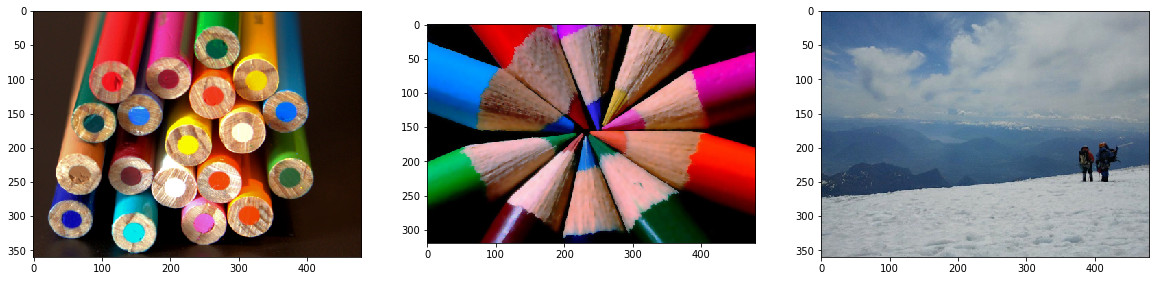

Image 1 size:  (360, 480, 3)
Image 2 size:  (320, 480, 3)
Image 3 size:  (360, 480, 3)


In [2]:
img1 = imageio.imread("images/pencil.png")
img2 = imageio.imread("images/pencil.jpg")
img3 = imageio.imread("images/mountain.jpg")
plt.figure(figsize=(20,10))
plt.subplot(131); plt.imshow(img1)
plt.subplot(132); plt.imshow(img2)
plt.subplot(133); plt.imshow(img3)
plt.show()

print("Image 1 size: ", str(img1.shape))
print("Image 2 size: ", str(img2.shape))
print("Image 3 size: ", str(img3.shape))

We want to define a method that gets any colour image as input and outputs a vector $\in R^m$ so that we are able to write distance functions between images in this space of colour attributes (often called features space) with $m$ dimensions.

A simple way to do it would be to use the histograms of all RGB channels

In [3]:
def RGB_histogram(img, bins):
    hist_R,_ = np.histogram(img[:,:,0], bins=bins, range=(0,255))
    hist_G,_ = np.histogram(img[:,:,1], bins=bins, range=(0,255))
    hist_B,_ = np.histogram(img[:,:,2], bins=bins, range=(0,255))
    return np.concatenate( (hist_R, hist_G, hist_B) )


In [4]:
rgbh_1 = RGB_histogram(img1, 256)
rgbh_2 = RGB_histogram(img2, 256)
rgbh_3 = RGB_histogram(img3, 256)

# printing the vector size
print(rgbh_1.shape)

(768,)


### Distance functions
In addition to defining a method for extracting a feature vector, it is important to define distance functions that operate on those vectors. Formally we want a function $d:R^m \rightarrow R^1$.

The Euclidean distance, or l-2 norm distance is the most widely used. Considering a pair of vectors $q$ and $p$ with $m$ dimensions each, it can be computed as follows

$\frac{1}{m} \sum_{i} (q_i - p_i)^2$ 

In [5]:
def Euclidean_distance(p, q):
    dist = np.sum(np.square(p-q))/float(p.shape[0])
    return dist

In [6]:
print("Distance 1-2 = %.3f" % (Euclidean_distance(rgbh_1, rgbh_2)))
print("Distance 1-3 = %.3f" % (Euclidean_distance(rgbh_1, rgbh_3)))
print("Distance 2-3 = %.3f" % (Euclidean_distance(rgbh_2, rgbh_3)))

Distance 1-2 = 2002988.979
Distance 1-3 = 2815993.846
Distance 2-3 = 5365441.953


Comparing the distances we note that indeed the images 1 and 2 are closer when compared to the distances between 1 and 3 and 2 and 3.

However, one problem is the high dimensionality of the features space, with $m=768$. One way to reduce would be to quantise the histograms into less bins, e.g. 16 bins each.

In [7]:
rgbh_1 = RGB_histogram(img1, 16)
rgbh_2 = RGB_histogram(img2, 16)
rgbh_3 = RGB_histogram(img3, 16)

print("Feature vector size = %d " % (rgbh_1.shape[0]))
print("Distance 1-2 = %.3f" % (Euclidean_distance(rgbh_1, rgbh_2)))
print("Distance 1-3 = %.3f" % (Euclidean_distance(rgbh_1, rgbh_3)))
print("Distance 2-3 = %.3f" % (Euclidean_distance(rgbh_2, rgbh_3)))



Feature vector size = 48 
Distance 1-2 = 77641832.708
Distance 1-3 = 401180670.000
Distance 2-3 = 410731835.375


Another approach is to obtain a single channel from the RGB image, combining the colour channels using a RGB to grayscale conversion. There are many methods, such as Intensity, Luminance, Luma and other. Let us use the Luminance, which is a weighted averabe of the colour channels.

In [8]:
def normalize_minmax(f, factor):
    f_min = np.min(f)
    f_max = np.max(f)
    f = (f - f_min)/(f_max-f_min)
    return (f*factor)


def Luminance(img):
    img = np.array(img, copy=True).astype(float)
    # computing conversion
    new_img = np.zeros((img.shape[0], img.shape[1]))
    new_img = img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114
    new_img = normalize_minmax(new_img, 255)
    
    return new_img

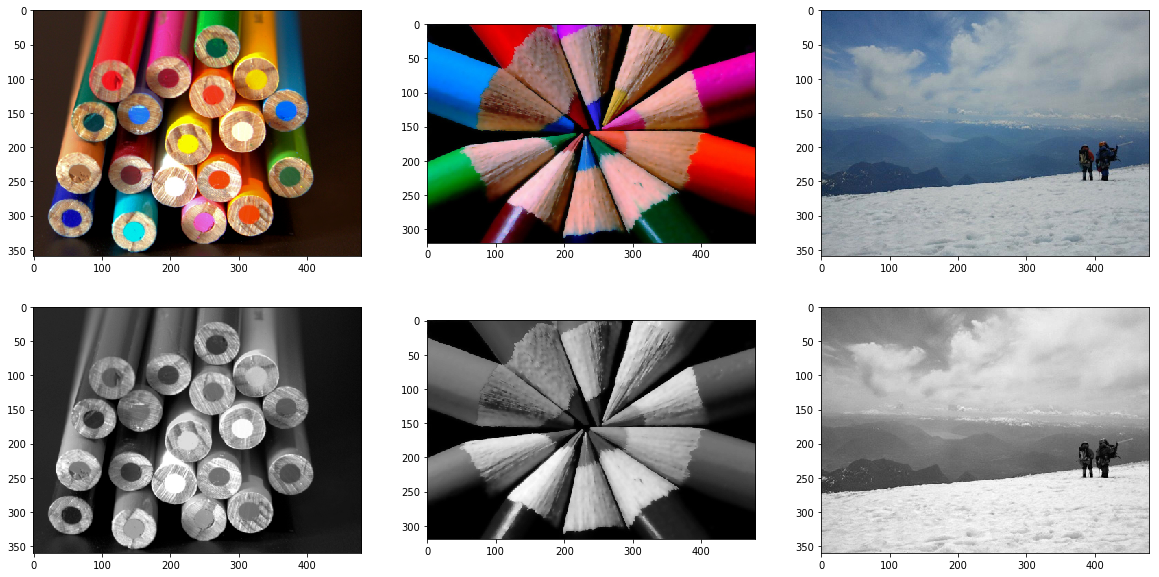

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(231); plt.imshow(img1)
plt.subplot(232); plt.imshow(img2)
plt.subplot(233); plt.imshow(img3)
plt.subplot(234); plt.imshow(Luminance(img1), cmap="gray")
plt.subplot(235); plt.imshow(Luminance(img2), cmap="gray")
plt.subplot(236); plt.imshow(Luminance(img3), cmap="gray")

plt.show()

In [10]:
def grayscale_histogram(img, bins):
    hist,_ = np.histogram(img, bins=bins, range=(0,255))
    return hist

In [11]:
gh_1 = grayscale_histogram(img1, 48)
gh_2 = grayscale_histogram(img2, 48)
gh_3 = grayscale_histogram(img3, 48)

print("Feature vector size = %d " % (gh_1.shape[0]))
print("Distance 1-2 = %.3f" % (Euclidean_distance(gh_1, gh_2)))
print("Distance 1-3 = %.3f" % (Euclidean_distance(gh_1, gh_3)))
print("Distance 2-3 = %.3f" % (Euclidean_distance(gh_2, gh_3)))

Feature vector size = 48 
Distance 1-2 = 170703265.625
Distance 1-3 = 409857449.542
Distance 2-3 = 668122829.750


Therefore, even after projecting the RGB colour space into a single-channel space, it is possible to obtain a fair comparison between the images. 

However, we used images that are easy to discriminate. More complex cases would require methods that are able to capture other attributes in terms of colour, such as considering the regions the colour appears: flat regions, texture regions, borders, and not only the frequency of colours as demonstrated.

Alternative distance functions are also important to consider. For colour features spaces, the logarithm function may be useful to decrease the influence of background colours in the sum, and output smaller numbers.



In [14]:
def Log_Euclidean_distance(p, q):
    pl = np.log2(p.astype(float)+1)
    ql = np.log2(q.astype(float)+1)
    
    dist = np.sum(np.square(pl-ql))/float(pl.shape[0])
    return dist

In [15]:
print("Log Euclidean distances")
print("Distance 1-2 = %.3f" % (Log_Euclidean_distance(gh_1, gh_2)))
print("Distance 1-3 = %.3f" % (Log_Euclidean_distance(gh_1, gh_3)))
print("Distance 2-3 = %.3f" % (Log_Euclidean_distance(gh_2, gh_3)))

Log Euclidean distances
Distance 1-2 = 0.773
Distance 1-3 = 36.642
Distance 2-3 = 32.271
